In [7]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
import sys 

project_root = Path().cwd()
scripts_dir = project_root / "src" / "scripts"
sys.path.insert(0, str(scripts_dir))

import numpy as np 
import scipy.stats as stats
import scipy.io as sio
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import process_2p as p2p
import lick_behav_analysis as behav
from matplotlib.lines import Line2D
from scalebars import add_scalebar

# Recording parameters
fps = 15
framespertrial = 375 
ms_per_frame = int(1000//fps)
reward_frame = 150
cue_frame = 105
trials = 30
cmap = "bwr"

In [2]:
folder = '/Users/savani/Downloads/2p_data/water deprived sucrose quinine'
f_suc, f_w, base_suc, base_w, aligned_suc, aligned_w, all_f_suc, all_f_alt = p2p.process_2p_folder_mt(folder, n_trials = 60)

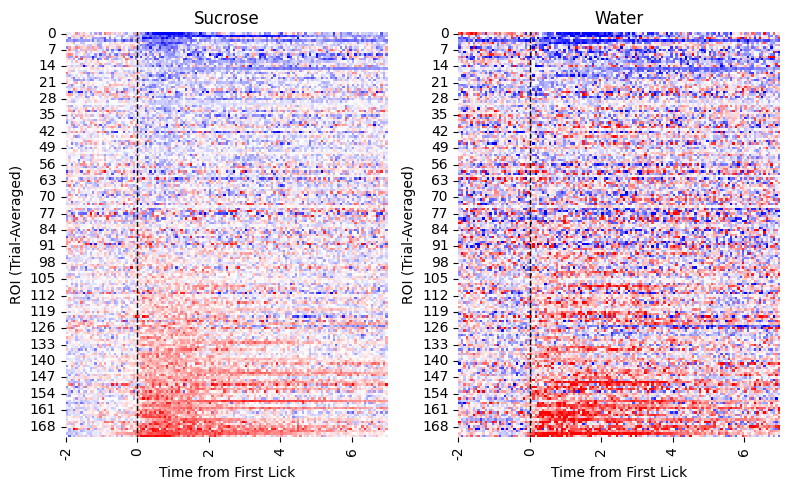

In [4]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(f_suc[:, 75:105], axis=1))
sorted_avg_mean = f_suc[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='bwr', cbar= False)
ax.vlines(x = 75, ymin = -1, ymax = f_suc.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_xlim(left = 45, right = 180)
ax.set_title("Sucrose")

sorted_avg_mean = f_w[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax2, vmin=0.8, vmax=1.2, cmap='bwr', cbar = False)
ax2.vlines(x = 75, ymin = -1, ymax = f_suc.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax2.set_xticks(np.arange(15, 255, 15)[::2])
ax2.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax2.set_ylabel("ROI (Trial-Averaged)")
ax2.set_xlabel("Time from First Lick")
ax2.set_xlim(left = 45, right = 180)
ax2.set_title("Water")
fig.tight_layout()

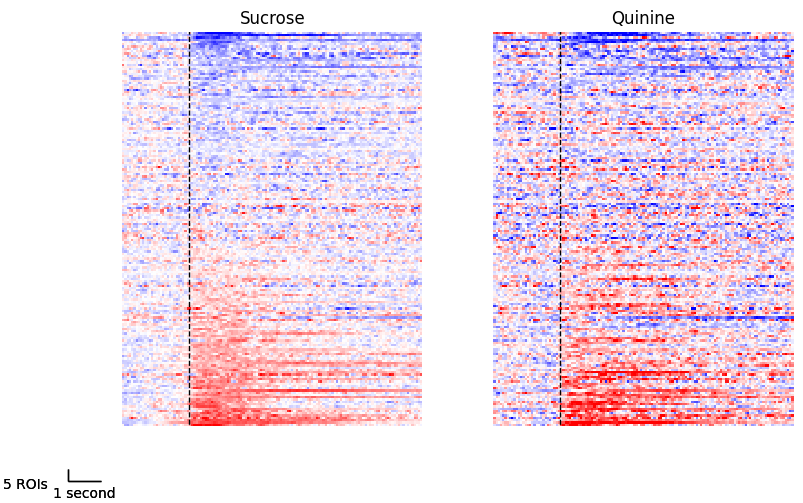

In [3]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(f_suc[:, 75:105], axis=1))

for cell in range(f_suc.shape[0]):
    f_suc[cell, :] = p2p.moving_average(f_suc[cell, :], 2)
    f_w[cell, :] = p2p.moving_average(f_w[cell, :], 2)


sorted_avg_mean = f_suc[ascending_order, :]

sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='bwr', cbar= False)
ax.vlines(x = 75, ymin = -1, ymax = f_suc.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_xlim(left = 45, right = 180)
ax.set_title("Sucrose")
sb = add_scalebar(ax, matchx=False, sizex=1*15, labelx='1 second', matchy=False, sep=4, sizey=-5, labely='5 ROIs',loc='lower left', bbox_to_anchor=(0, 0, 0.1, 0.4))

sorted_avg_mean = f_w[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax2, vmin=0.8, vmax=1.2, cmap='bwr', cbar = False)
ax2.vlines(x = 75, ymin = -1, ymax = f_suc.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax2.set_xticks(np.arange(15, 255, 15)[::2])
ax2.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax2.set_ylabel("ROI (Trial-Averaged)")
ax2.set_xlabel("Time from First Lick")
ax2.set_xlim(left = 45, right = 180)
ax2.set_title("Quinine")
fig.tight_layout()
sb = add_scalebar(ax2, matchx=False, sizex=1*15, labelx='1 second', matchy=False, sep=4, sizey=-5, labely='5 ROIs',loc='lower left', bbox_to_anchor=(0, 0, 0.1, 0.4))


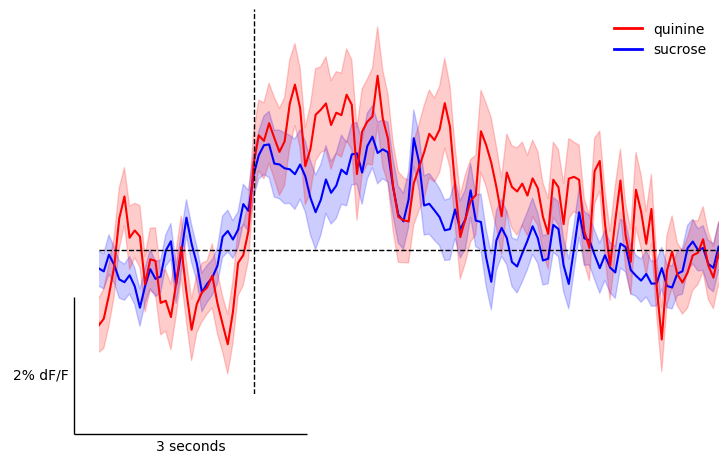

In [4]:

fig, ax = plt.subplots(1, figsize=(8, 5))
avg_f_suc = np.nanmean(f_suc, axis=0)
avg_f_w = np.nanmean(f_w, axis=0)
ax.plot(np.arange(0, 225), avg_f_suc, color = 'blue', label = 'Activated')
ax.plot(np.arange(0, 225), avg_f_w, color = 'red', label = 'Inhibited')
ax.fill_between(np.arange(0, 225), avg_f_suc - stats.sem(f_suc, axis=0), avg_f_suc + stats.sem(f_suc, axis=0), color = 'blue', alpha = 0.2)
ax.fill_between(np.arange(0, 225), avg_f_w - stats.sem(f_w, axis=0), avg_f_w + stats.sem(f_w, axis=0), color = 'red', alpha = 0.2)
ax.axvline(x = 75, color = 'black', linestyle = '--', lw = 1)
ax.axhline(y= 1, color = 'black', linestyle = '--', lw = 1)
sns.despine(left = True, bottom = True)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(left = 45, right = 165)
sb = add_scalebar(ax, matchx=False, sizex=3*15, labelx='3 seconds', matchy=False, sep=4, sizey=0.02, labely='2% dF/F',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))


custom_handles = [
    Line2D([0], [0], color='r', lw=2),
    Line2D([0], [0], color='b', lw=2)
]
custom_labels = ['quinine', 'sucrose']

plt.legend(custom_handles, custom_labels, loc='best', frameon = False)
